# Hacktiv8 Phase 0: Graded Challenge 1

---

# Introduction

Name : [Salman Faishal](https://github.com/salmanfaishal27)

Batch : 017

# Description

Dataset yang digunakan pada project ini adalah dataset yang berisi tentang data covid yang bersumber dari [Google Cloud Big Query]('https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_jhu_csse_eu&page=dataset&project=rock-wonder-317907&ws=!1m4!1m3!3m2!1sbigquery-public-data!2scovid19_jhu_csse_eu) dengan menggunakan tabel ```summary```, tabel ini diperbarui pada tanggal 5 desember 2022 12:17:39 AM UTC+7, pada project ini data yang digunakan adalah data  yang sudah di filter sesuai dengan kebutuhan analisis sehingga dataset ini berisi 33587 baris data dan 7 kolom yang digunakan yaitu province_state, country_region, date, confirmed, deaths, recovered, dan active, dataset ini memiliki data dari 2020-03-11 sampai 2022-12-03

## Objective

Graded Challenge 1 ini dibuat guna mengevaluasi konsep Basic SQL, Python, serta Data Preparation with Pandas sebagai berikut:

- Mampu memuat data dengan Pandas
- Mampu menangani missing values pada dataset
- Mampu melakukan manipulasi kolom
- Mampu membuat query terhadap dataset
- Mampu melakukan grouping terhadap dataset
- Mampu melakukan visualisasi sederhana menggunakan Pandas

## Problem statement

1. Daerah mana yang memiliki tingkat kematian tertinggi di negara China?
2. Tahun berapa dan dimana terjadinya kasus kematian tertinggi di negara China?
3. Didaerah mana kasus baru terbanyak ditemukan dinegara China?



# Working Area

Query yang digunakan pada saat mengambil dataset di [Google Cloud Big Query](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=covid19_jhu_csse_eu&page=dataset&project=rock-wonder-317907)

```
SELECT province_state, country_region, date, confirmed, deaths, recovered, active 
FROM bigquery-public-data.covid19_jhu_csse_eu.summary
WHERE country_region = 'China'
```

Query tersebut digunakan untuk mengambil kolom ```province_state, country_region, date, confirmed, deaths, recovered, active``` pada tabel ```summary``` pada database covid19_jhu_csse_eu

## Import Libraries

Mengimport library yang akan digunakan, dalam project ini library yang digunakan pandas dan matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [2]:
pd.set_option("display.max.columns", None)

## Data Loading

In [3]:
data_covid = pd.read_csv('h8dsft_P0GC1_Salman_Faishal.csv')

membuat data frame dari file ```h8dsft_P0GC1_Salman_Faishal.csv```

In [4]:
data_covid.head()

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Hong Kong,China,2022-03-15,647631,4568,NaN,NaN
1,Hong Kong,China,2022-06-10,1217510,9390,NaN,NaN
2,Hong Kong,China,2021-05-04,11790,210,11451.0,129.0
3,Hong Kong,China,2020-10-11,5182,105,4919.0,158.0
4,Hong Kong,China,2020-10-14,5201,105,4932.0,164.0


Menampilkan 5 data pertama dari dataframe ```h8dsft_P0GC1_Salman_Faishal.csv```

In [5]:
data_covid.tail() # Menampilkan 5 data terakhir dari dataframe yang sudah di filter negaranya

,province_state,country_region,date,confirmed,deaths,recovered,active
33582,Hubei,China,2021-08-02,68201,4512,63665.0,24.0
33583,Hubei,China,2020-12-06,68149,4512,63633.0,4.0
33584,Hubei,China,2021-05-02,68158,4512,63640.0,6.0
33585,Hubei,China,2020-09-25,68139,4512,63627.0,0.0
33586,Hubei,China,2021-09-19,68295,4512,NaN,NaN


## Data Characteristic

In [6]:
data_covid.shape # Menampilkan bentuk dataframe

(33587, 7)

In [7]:
data_covid.info() # Menampilkan info dari dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33587 entries, 0 to 33586
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  33587 non-null  object 
 1   country_region  33587 non-null  object 
 2   date            33587 non-null  object 
 3   confirmed       33587 non-null  int64  
 4   deaths          33587 non-null  int64  
 5   recovered       17063 non-null  float64
 6   active          16687 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.8+ MB


Dataset ini terdiri dari

- 2 kolom dengan tipe data float
- 3 kolom dengan tipe data object
- 2 kolom dengan tipe data int

dari info tersebut terdapat beebrapa kolom yang tidak terisi

In [8]:
data_covid.describe().T # Menampilkan summary statistic dari dataframe

,count,mean,std,min,25%,50%,75%,max
confirmed,33587.0,21056.818174,147152.018357,0.0,254.0,937.0,1683.0,2148489.0
deaths,33587.0,218.849704,1125.018502,0.0,1.0,3.0,7.0,10790.0
recovered,17063.0,2640.019516,10772.236680,0.0,178.0,536.0,985.0,64435.0
active,16687.0,26.500929,130.245142,-195.0,0.0,2.0,11.0,5223.0


Dari hasil di atas kita dapat melihat summary statistics dari kolom dataframe dengan tipe data numeric seperti rata-rata, standar deviasi, quartile, nilai minimum, dan nilai maksimum.

## Data Cleansing

### Missing Value Check

In [9]:
data_covid.isna().sum() # Menampilkan jumalah dari value yang kosong

province_state        0
country_region        0
date                  0
confirmed             0
deaths                0
recovered         16524
active            16900
dtype: int64

In [10]:
print(f'Persentase missing value dari kolom recovered: {(data_covid.recovered.isna().sum()/len(data_covid)*100):.2f}%') # Menghitung persentase missing value
print(f'Persentase missing value dari kolom active: {(data_covid.active.isna().sum()/len(data_covid)*100):.2f}%')

Persentase missing value dari kolom recovered: 49.20%
Persentase missing value dari kolom active: 50.32%


Data tersebut memiliki 2 kolom missing value yaitu:
- recovered sebanyak 16524 atau dalam persentase sebesar 49,20% missing value
- active sebanyak 16524 atau dalam persentase sebesar 50,32% missing value

### Drop Column

In [11]:
data_covid.drop( columns = ['recovered', 'active'],inplace = True)
# Menghapus kolom recovered dan active 


Menghapus 2 kolom yang tidak akan digunakan pada analisis ini karena memiliki missing value lebih dari 40%  dan kemungkinan besar data tersebut tidak dapat di analisis.

In [12]:
data_covid.info() # Menampilkan info dari dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33587 entries, 0 to 33586
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   province_state  33587 non-null  object
 1   country_region  33587 non-null  object
 2   date            33587 non-null  object
 3   confirmed       33587 non-null  int64 
 4   deaths          33587 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


Seteleah ada perubahan pada kolom, Dataframe ini terdiri dari:

- 2 kolom dengan tipe data float
- 3 kolom dengan tipe data object

In [13]:
data_covid.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,33587.0,21056.818174,147152.018357,0.0,254.0,937.0,1683.0,2148489.0
deaths,33587.0,218.849704,1125.018502,0.0,1.0,3.0,7.0,10790.0


Dari hasil di atas kita dapat melihat summary statistics yang sudah berubah karena beberapa kolom sudah dihapus

In [14]:
data_covid.isna().sum() # Menampilkan jumalah dari value yang kosong

province_state    0
country_region    0
date              0
confirmed         0
deaths            0
dtype: int64

Setelah melakukan penghapusan kolom tidak terdapat lagi missing value

## Rename Column

In [15]:
data_covid.head() # Menampilkan 5 data teratas dari dataframe

,province_state,country_region,date,confirmed,deaths
0,Hong Kong,China,2022-03-15,647631,4568
1,Hong Kong,China,2022-06-10,1217510,9390
2,Hong Kong,China,2021-05-04,11790,210
3,Hong Kong,China,2020-10-11,5182,105
4,Hong Kong,China,2020-10-14,5201,105


Dataframe sebelum dilakukan perubahan nama pada kolom

In [16]:
data_covid = data_covid.rename(columns={'province_state': 'state', 'country_region': 'country'}) # Mengganti nama kolom province_state menjadi state dan country_region menjadi country

In [17]:
data_covid.tail() # Menampilkan 5 data terbawah dari dataframe

,state,country,date,confirmed,deaths
33582,Hubei,China,2021-08-02,68201,4512
33583,Hubei,China,2020-12-06,68149,4512
33584,Hubei,China,2021-05-02,68158,4512
33585,Hubei,China,2020-09-25,68139,4512
33586,Hubei,China,2021-09-19,68295,4512


Setelah dilakukan perubahan nama pada kolom

In [18]:
data_covid['date'] = pd.to_datetime(data_covid.date) # Melakukan perubahan tipe data menjadi datetime

In [19]:
data_covid.info() # Menampilkan info dari dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33587 entries, 0 to 33586
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      33587 non-null  object        
 1   country    33587 non-null  object        
 2   date       33587 non-null  datetime64[ns]
 3   confirmed  33587 non-null  int64         
 4   deaths     33587 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.3+ MB


Setelah dilakukan perubahan tipe data, kolom date berubah menjadi datetime yang sebelumnya memiliki tipe data object, sehingga dataframe ini terdiri dari:

- 1 kolom dengan tipe data datetime
- 2 kolom dengan tipe data int
- 2 kolom dengan tipe data object

## Data Exploration

1. Daerah mana yang memiliki tingkat kematian tertinggi di negara China?

In [20]:
data_covid.groupby(['state'])['deaths'].sum().head().sort_values(ascending=False) # Menjumlahkan value kolom deaths berdasarkan setiap daerah yang terdapat di kolom state

state
Beijing      8990
Chongqing    5994
Anhui        5988
Gansu        1996
Fujian        998
Name: deaths, dtype: int64

<AxesSubplot: title={'center': ' Grafik tingkat kematian di negara China'}, xlabel='state'>

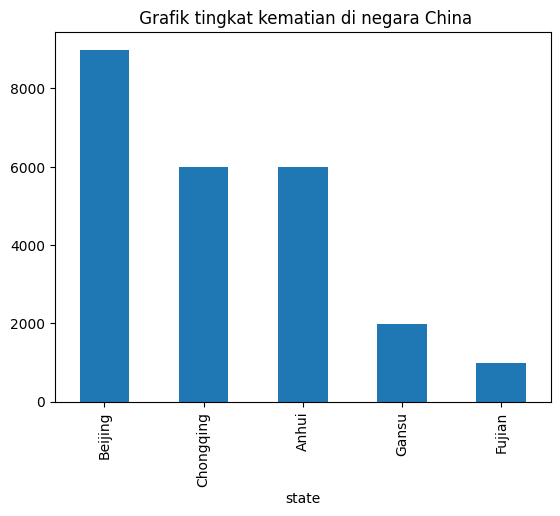

In [21]:
data_covid.groupby(['state'])['deaths'].sum().head().sort_values(ascending=False).plot(kind = 'bar', title= ' Grafik tingkat kematian di negara China')
# Menjumlahkan value kolom deaths berdasarkan setiap daerah yang terdapat di kolom state dan menampilkan dalam bentuk visualisasi data

Hasil query diatas menampilkan 5 daerah yang memiliki kematian terbanyak dari yang paling tinggi ke terendah, lebih tepatnya:
- Beijing sebanyak 8990 orang meninggal
- Chongqing sebanyak 5994 orang meninggal
- Anhui sebanyak 5988 orang meninggal
- Gansu sebanyak 1996 orang meninggal
- Fujian sebanyak 998 orang meninggal

In [22]:
data_covid[data_covid.state == 'Beijing'].deaths.mean() # Melakukan perhitungan rata rata di daerah Beijing

9.008016032064129

2. Tahun berapa dan dimana terjadinya kasus kematian tertinggi di negara China?

In [23]:
data_covid.groupby([data_covid.date.dt.year,'state'])['deaths'].sum().head().sort_values(ascending= False)
# Menjumlahkan value kolom deaths berdasarkan setiap daerah yang terdapat di kolom state dan tanggal sesuai tahun pada kolom date

date  state    
2020  Beijing      2618
      Anhui        1776
      Chongqing    1776
      Gansu         592
      Fujian        296
Name: deaths, dtype: int64

Dari hasil grouping diatas jumlah kematian tertinggi di setiap daerah berada di tahun 2020 dan yang mengalami kematian terbanyak berada di daerah Beijing

<AxesSubplot: title={'center': 'Grafik kematian tertinggi di negara China'}, ylabel='date,state'>

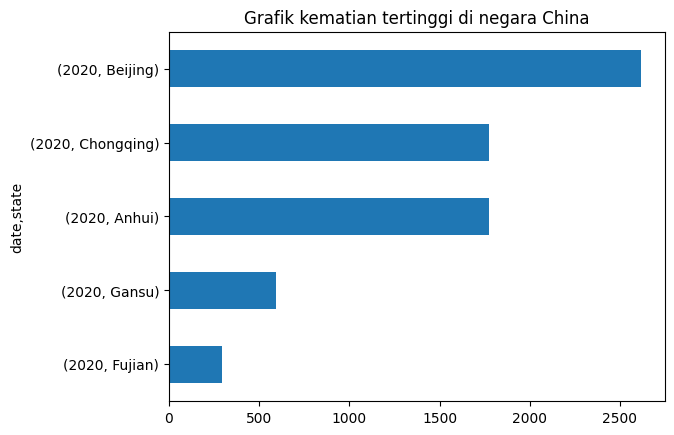

In [24]:
data_covid.groupby([data_covid.date.dt.year,'state'])['deaths'].sum().head().sort_values().plot(kind = 'barh', title=('Grafik kematian tertinggi di negara China'))
# Menjumlahkan kolom deaths berdasarkan setiap daerah yang terdapat di kolom state dan tanggal sesuai tahun pada kolom date, dan memvisualisasikan datanya

Pada grafik diatas daerah yang mengalami kematian tertinggi adalah Beijing pada tahun 2020

3. Didaerah mana kasus baru terbanyak ditemukan dinegara China?

In [25]:
data_covid.groupby(['state'])['confirmed'].sum().head().sort_values(ascending= False)
# Menjumlahkan value kolom confirmed berdasarkan setiap daerah yang terdapat di kolom state

state
Beijing      1772320
Fujian       1542152
Anhui        1081947
Chongqing     743228
Gansu         428946
Name: confirmed, dtype: int64

In [26]:
data_covid[data_covid.state == 'Beijing'].groupby(data_covid.date.dt.year).confirmed.sum()
# Menjumlahkan value kolom confirmed dan melakukan filter terhadap kolom state untuk menampilkan daerah Beijing berdasarkan tanggal tiap tahun  

date
2020     241638
2021     399026
2022    1131656
Name: confirmed, dtype: int64

Dari dataframe diatas jumlah kasus baru yang sudah dikonfirmasi didaerah Beijing sebanyak 1,772,320 orang diantaranya:

- pada tahun 2020 sebanyak 241638 orang
- pada tahun 2021 sebanyak 399026 orang
- pada tahun 2022 sebanyak 1131656 orang

<AxesSubplot: title={'center': ' Grafik kasus baru terbanyak di China'}, ylabel='state'>

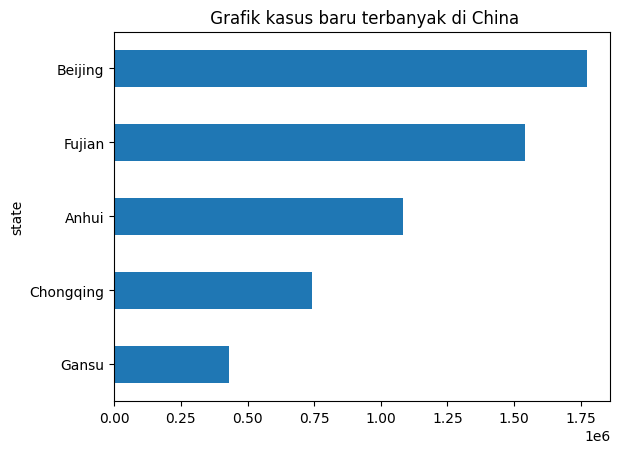

In [27]:
data_covid.groupby(['state'])['confirmed'].sum().head().sort_values().plot(kind = 'barh',title= ' Grafik kasus baru terbanyak di China')
# Menjumlahkan value kolom confirmed berdasarkan setiap daerah yang terdapat di kolom state dan menampilkan dalam bentuk visualisasi data

Dari hasil grafik diatas, Beijing adalah daerah yang memiliki kasus baru tertinggi

## Conclusions, Assumptions, Overall Analysis

Kesimpulan yang dapat ditarik dari hasil data explorasi ini adalah:

- Daerah mana yang memiliki tingkat kematian tertinggi di negara China?

Daerah yang mengalami tingkat kematian tertinggi adalah negara ```Beijing``` karena di daerah Beijing mengalami peningkatan tertinggi pada tahun 2020.

- Tahun berapa dan dimana terjadinya kasus kematian tertinggi di negara China?

Jumlah kematian di Beijing pada tahun ```2020``` menjadi yang tertinggi di China dibandingkan dengan daerah lain, dan jumlah kematian tertinggi di tahun 2020 ini bisa menjadi faktor penyebab daerah Beijing mengalami kematian terbanyak di China sesuai dengan analisis yang tertera di point 1.

- Didaerah mana kasus baru terbanyak ditemukan dinegara China?
  
Kasus baru dengan jumlah paling banyak di temukan di daerah ```Beijing``` sebanyak 1,131,656 orang, hal ini juga bisa menjadi faktor penyebab kematian terbanyak di Beijing.



Kasus rata rata kematian di negara China adalah 218.84 dan kasus rata rata kematian di daerah Beijing adalah 9 sehingga kasus kematian di Beijing masih dibawah kasus kematian rata rata di negara China, sehingga dapat disimpulkan bahwa baik pemerintah maupun tenaga medis daerah Beijing mampu melakaukan penanganan yang tepat.